# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Capstone Project Webscrapping untuk membuat visualisasi dari data historis nilai tukar antara USD dengan IDR dari 1 Januari 2022 hingga 8 Juli 2022. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [53]:
import requests

url = 'https://www.exchange-rates.org/history/IDR/USD/T' 
url_get = requests.get(url, headers = { 'User-Agent': 'Popular browser\'s user-agent', })

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [54]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [55]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [56]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [57]:
print(soup.prettify()[1:500])

!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charse


In [58]:
table = soup.find('table', attrs = {'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:1000])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    7/8/2022
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-8-2022">
     14,976.95000
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-8-2022">
     USD IDR rate for 7/8/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/7/2022
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-7-2022">
     14,964.65000
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-7-2022">
     USD IDR rate for 7/7/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/6/2022
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-6-2022">
     14,996.82520
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-6-2022">
     USD IDR rate for 7/6/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>


Finding row length.

In [59]:
tr = table.find_all('tr')
tr_length = len(tr)
tr_length

130

Do the scrapping process here (please change this markdown with your explanation)

In [62]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get date
    date = row.find_all('td')[0].text
    date = date.strip() #for removing the excess whitespace
    
    #get price
    price = row.find_all('td')[2].text
    price = price.strip() #for removing the excess whitespace
    
    temp.append((date,price)) 
    
temp

[('7/7/2022', '14,964.65000 IDR'),
 ('7/6/2022', '14,996.82520 IDR'),
 ('7/5/2022', '15,014.65000 IDR'),
 ('7/4/2022', '14,994.55000 IDR'),
 ('7/1/2022', '14,975.15000 IDR'),
 ('6/30/2022', '14,928.80000 IDR'),
 ('6/29/2022', '14,868.90000 IDR'),
 ('6/28/2022', '14,852.35000 IDR'),
 ('6/27/2022', '14,807.70000 IDR'),
 ('6/24/2022', '14,829.50000 IDR'),
 ('6/23/2022', '14,848.80000 IDR'),
 ('6/22/2022', '14,833.90000 IDR'),
 ('6/21/2022', '14,833.60000 IDR'),
 ('6/20/2022', '14,827.75000 IDR'),
 ('6/17/2022', '14,838.85000 IDR'),
 ('6/16/2022', '14,809.20000 IDR'),
 ('6/15/2022', '14,695.10000 IDR'),
 ('6/14/2022', '14,764.20000 IDR'),
 ('6/13/2022', '14,782.80000 IDR'),
 ('6/10/2022', '14,614.95000 IDR'),
 ('6/9/2022', '14,611.85000 IDR'),
 ('6/8/2022', '14,513.20000 IDR'),
 ('6/7/2022', '14,465.30000 IDR'),
 ('6/6/2022', '14,437.70000 IDR'),
 ('6/3/2022', '14,433.50000 IDR'),
 ('6/2/2022', '14,435.00000 IDR'),
 ('6/1/2022', '14,555.60000 IDR'),
 ('5/31/2022', '14,580.63428 IDR'),
 ('5

In [64]:
#reverse
temp = temp[::-1]
temp

[('7/7/2022', '14,964.65000 IDR'),
 ('7/6/2022', '14,996.82520 IDR'),
 ('7/5/2022', '15,014.65000 IDR'),
 ('7/4/2022', '14,994.55000 IDR'),
 ('7/1/2022', '14,975.15000 IDR'),
 ('6/30/2022', '14,928.80000 IDR'),
 ('6/29/2022', '14,868.90000 IDR'),
 ('6/28/2022', '14,852.35000 IDR'),
 ('6/27/2022', '14,807.70000 IDR'),
 ('6/24/2022', '14,829.50000 IDR'),
 ('6/23/2022', '14,848.80000 IDR'),
 ('6/22/2022', '14,833.90000 IDR'),
 ('6/21/2022', '14,833.60000 IDR'),
 ('6/20/2022', '14,827.75000 IDR'),
 ('6/17/2022', '14,838.85000 IDR'),
 ('6/16/2022', '14,809.20000 IDR'),
 ('6/15/2022', '14,695.10000 IDR'),
 ('6/14/2022', '14,764.20000 IDR'),
 ('6/13/2022', '14,782.80000 IDR'),
 ('6/10/2022', '14,614.95000 IDR'),
 ('6/9/2022', '14,611.85000 IDR'),
 ('6/8/2022', '14,513.20000 IDR'),
 ('6/7/2022', '14,465.30000 IDR'),
 ('6/6/2022', '14,437.70000 IDR'),
 ('6/3/2022', '14,433.50000 IDR'),
 ('6/2/2022', '14,435.00000 IDR'),
 ('6/1/2022', '14,555.60000 IDR'),
 ('5/31/2022', '14,580.63428 IDR'),
 ('5

## Creating data frame & Data wrangling

Put the array into dataframe

In [75]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date', 'price'))
df.head()

,date,price
0,7/7/2022,"14,964.65000 IDR"
1,7/6/2022,"14,996.82520 IDR"
2,7/5/2022,"15,014.65000 IDR"
3,7/4/2022,"14,994.55000 IDR"
4,7/1/2022,"14,975.15000 IDR"


In [79]:
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

Data Cleansing & Wrangling
1. Convert date column type to datetype64
2. Remove commas and IDR so the price column can be converted to float

In [78]:
df['date'] = df['date'].astype('datetime64')
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].str.replace(' IDR','')
df['price'] = df['price'].astype('float')
df.head()

,date,price
0,2022-07-07,14964.6500
1,2022-07-06,14996.8252
2,2022-07-05,15014.6500
3,2022-07-04,14994.5500
4,2022-07-01,14975.1500


In [81]:
df = df.set_index('date')

<AxesSubplot:xlabel='date'>

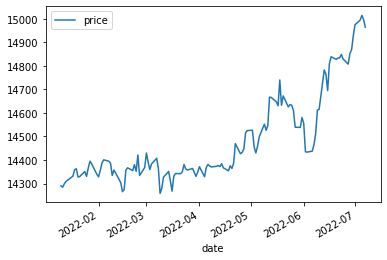

In [82]:
df.plot()

In [84]:
df['price'].max()

15014.65

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Sejak 10 Januari 2022, terdapat fluktuasi pada kurs USD ke IDR namun secara umum trennya terus menguat dengan nilai tertinggi mencapai Rp 15014.65 per USD.


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.